이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

2022-05-21 01:01:27.403814: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
375/375 [==============================] - 3s 8ms/step - loss: 0.6158 - accuracy: 0.8106 - val_loss: 0.2610 - val_accuracy: 0.9242
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2563 - accuracy: 0.9197 - val_loss: 0.2508 - val_accuracy: 0.9234
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1684 - accuracy: 0.9475 - val_loss: 0.1487 - val_accuracy: 0.9558
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1220 - accuracy: 0.9618 - val_loss: 0.1407 - val_accuracy: 0.9590
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0892 - accuracy: 0.9716 - val_loss: 0.1349 - val_accuracy: 0.9604
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0652 - accuracy: 0.9792 - val_loss: 0.1354 - val_accuracy: 0.9617
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0499 - accuracy: 0.9840 - val_loss: 0.1431 - val_accuracy: 0.9605
Epoch 

**검증 정확도 비교 그래프 그리기**

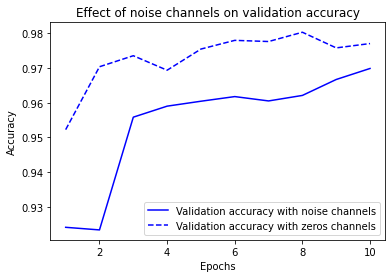

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3168 - accuracy: 0.1006 - val_loss: 2.3052 - val_accuracy: 0.1036
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2997 - accuracy: 0.1165 - val_loss: 2.3132 - val_accuracy: 0.0977
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2906 - accuracy: 0.1282 - val_loss: 2.3238 - val_accuracy: 0.1044
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2766 - accuracy: 0.1395 - val_loss: 2.3324 - val_accuracy: 0.0997
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2583 - accuracy: 0.1554 - val_loss: 2.3478 - val_accuracy: 0.0956
Epoch 6/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2378 - accuracy: 0.1703 - val_loss: 2.3524 - val_accuracy: 0.0959
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 2.2135 - accuracy: 0.1830 - val_loss: 2.3730 - val_accuracy: 0.0981

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 956.4675 - accuracy: 0.3946 - val_loss: 3.5492 - val_accuracy: 0.2813
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 4.6012 - accuracy: 0.2683 - val_loss: 2.1531 - val_accuracy: 0.2711
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.9923 - accuracy: 0.2559 - val_loss: 2.1568 - val_accuracy: 0.2036
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.7545 - accuracy: 0.2514 - val_loss: 2.9839 - val_accuracy: 0.3231
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 3.2284 - accuracy: 0.2866 - val_loss: 2.3702 - val_accuracy: 0.2873
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.5103 - accuracy: 0.2761 - val_loss: 2.1773 - val_accuracy: 0.2202
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 2.4951 - accuracy: 0.2595 - val_loss: 2.8390 - val_accuracy: 0.2891
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.3735 - accuracy: 0.9098 - val_loss: 0.1643 - val_accuracy: 0.9557
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1400 - accuracy: 0.9640 - val_loss: 0.1392 - val_accuracy: 0.9669
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1149 - accuracy: 0.9730 - val_loss: 0.1867 - val_accuracy: 0.9610
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0993 - accuracy: 0.9778 - val_loss: 0.1815 - val_accuracy: 0.9715
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0848 - accuracy: 0.9815 - val_loss: 0.2341 - val_accuracy: 0.9691
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0806 - accuracy: 0.9834 - val_loss: 0.2015 - val_accuracy: 0.9727
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0719 - accuracy: 0.9865 - val_loss: 0.2717 - val_accuracy: 0.9685
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6708 - accuracy: 0.8349 - val_loss: 0.3596 - val_accuracy: 0.9038
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.9026 - val_loss: 0.3089 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3162 - accuracy: 0.9117 - val_loss: 0.2901 - val_accuracy: 0.9185
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.9163 - val_loss: 0.2812 - val_accuracy: 0.9196
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2903 - accuracy: 0.9187 - val_loss: 0.2749 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.9206 - val_loss: 0.2741 - val_accuracy: 0.9244
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9227 - val_loss: 0.2694 - val_accuracy: 0.9246
Epoch 

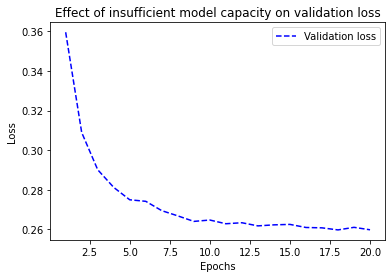

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.3613 - accuracy: 0.8980 - val_loss: 0.2050 - val_accuracy: 0.9401
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1603 - accuracy: 0.9523 - val_loss: 0.1302 - val_accuracy: 0.9623
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1145 - accuracy: 0.9659 - val_loss: 0.1135 - val_accuracy: 0.9668
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.1044 - val_accuracy: 0.9691
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9789 - val_loss: 0.1364 - val_accuracy: 0.9583
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.1086 - val_accuracy: 0.9691
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0935 - val_accuracy: 0.9746
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5206 - accuracy: 0.8014 - val_loss: 0.3950 - val_accuracy: 0.8709
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3199 - accuracy: 0.9005 - val_loss: 0.3420 - val_accuracy: 0.8611
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2366 - accuracy: 0.9255 - val_loss: 0.2835 - val_accuracy: 0.8899
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1868 - accuracy: 0.9394 - val_loss: 0.2920 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1540 - accuracy: 0.9509 - val_loss: 0.2746 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1266 - accuracy: 0.9601 - val_loss: 0.2858 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1038 - accuracy: 0.9691 - val_loss: 0.3048 - val_accuracy: 0.8850
Epoch 8/20
30

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.6109 - accuracy: 0.7743 - val_loss: 0.5419 - val_accuracy: 0.8368
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4792 - accuracy: 0.8785 - val_loss: 0.4481 - val_accuracy: 0.8662
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3874 - accuracy: 0.9012 - val_loss: 0.3844 - val_accuracy: 0.8774
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3210 - accuracy: 0.9144 - val_loss: 0.3397 - val_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2718 - accuracy: 0.9254 - val_loss: 0.3123 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2343 - accuracy: 0.9337 - val_loss: 0.2949 - val_accuracy: 0.8897
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2059 - accuracy: 0.9420 - val_loss: 0.2812 - val_accuracy: 0.8921
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5415 - accuracy: 0.7588 - val_loss: 0.2896 - val_accuracy: 0.8829
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.2697 - accuracy: 0.8931 - val_loss: 0.2733 - val_accuracy: 0.8867
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1415 - accuracy: 0.9493 - val_loss: 0.3534 - val_accuracy: 0.8785
Epoch 4/20
30/30 [==============================] - 2s 74ms/step - loss: 0.0855 - accuracy: 0.9726 - val_loss: 0.5873 - val_accuracy: 0.8282
Epoch 5/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1175 - accuracy: 0.9763 - val_loss: 0.3404 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 2s 72ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.4938 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 9.6325e-04 - accuracy: 0.9998 - val_loss: 0.5984 - val_accuracy: 0.8877
Epoch 8/2

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5787 - accuracy: 0.7929 - val_loss: 0.4689 - val_accuracy: 0.8470
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3892 - accuracy: 0.8927 - val_loss: 0.3838 - val_accuracy: 0.8838
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.3288 - accuracy: 0.9137 - val_loss: 0.3636 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2975 - accuracy: 0.9272 - val_loss: 0.3631 - val_accuracy: 0.8860
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2766 - accuracy: 0.9333 - val_loss: 0.3683 - val_accuracy: 0.8821
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2708 - accuracy: 0.9329 - val_loss: 0.3644 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2529 - accuracy: 0.9429 - val_loss: 0.3637 - val_accuracy: 0.8837
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.6506 - accuracy: 0.6252 - val_loss: 0.5948 - val_accuracy: 0.6429
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5570 - accuracy: 0.7669 - val_loss: 0.5365 - val_accuracy: 0.6993
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.4997 - accuracy: 0.8367 - val_loss: 0.4947 - val_accuracy: 0.8158
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4624 - accuracy: 0.8798 - val_loss: 0.4843 - val_accuracy: 0.8327
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4317 - accuracy: 0.9024 - val_loss: 0.4688 - val_accuracy: 0.8687
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.4090 - accuracy: 0.9189 - val_loss: 0.4877 - val_accuracy: 0.8551
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3827 - accuracy: 0.9296 - val_loss: 0.4758 - val_accuracy: 0.8653
Epoch 8/20
30

## 요약